In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
fpaths = "./testes_seq_paral/test_staub_new_n//"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8]
speedups = []

In [46]:
sequenciais = []

for i in sizes:
    print(i)
    sequencial_local = []
    with open(f"{fpaths}logs_sequencial/log_seq_{i}_out.txt", "r") as arquivo:
        for linha in arquivo:
            if "Tempo sequencial" in linha:
                aux = linha.split(":")
                aux = aux[1].split("sec")
                aux = aux[0]
                print(float(aux))
                sequencial_local.append(float(aux))
    print(len(sequencial_local))
    sequenciais.append(np.mean(sequencial_local))

small
6.351849
1
medium
49.453039
1
large
395.180291
1


In [47]:
paralelos_pthread = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "Tempo paralelo" in linha:
                    aux = linha.split(":")
                    aux = aux[1].split("sec")
                    aux = aux[0]
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_pthread.append(np.mean(paralelo_local))

pthreads - small threads 2
3.112335
1
pthreads - small threads 4
1.680927
1
pthreads - small threads 8
1.66027
1
pthreads - medium threads 2
24.700184
1
pthreads - medium threads 4
14.218275
1
pthreads - medium threads 8
16.491429
1
pthreads - large threads 2
228.165488
1
pthreads - large threads 4
148.141558
1
pthreads - large threads 8
150.100753
1


In [48]:
paralelos_mpi = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"mpi - {i} threads {j}")
        with open(f"{fpaths}logs_mpi/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "Tempo mpi" in linha:
                    aux = linha.split(":")
                    aux = aux[1].split("sec")
                    aux = aux[0]
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_mpi.append(np.mean(paralelo_local))

mpi - small threads 2
3.530239
1
mpi - small threads 4
2.611371
1
mpi - small threads 8
2.632326
1
mpi - medium threads 2
31.12687
1
mpi - medium threads 4
20.844511
1
mpi - medium threads 8
20.782595
1
mpi - large threads 2
246.538972
1
mpi - large threads 4
166.312071
1
mpi - large threads 8
165.253166
1


In [24]:
sequenciais

[212.1665868, 566.8816898, 1179.0361067999997]

In [25]:
paralelos_pthread

[112.52973999999999,
 63.6676372,
 65.8545606,
 63.088581,
 300.7570134,
 170.85254760000004,
 174.8593222,
 169.41863719999998,
 627.7086204,
 356.070965,
 365.1451656,
 355.0825152]

In [26]:
paralelos_mpi

[113.7965784,
 64.008072,
 64.8699278,
 66.418262,
 299.6931968,
 170.0283688,
 172.26373640000003,
 176.44188400000002,
 633.5723697999999,
 356.464248,
 360.13467120000007,
 276.63176233333337]

In [49]:
speedups_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_pthread[i] for i in range(aux,len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_pthread[i] for i in range(aux,aux+len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_pthread[i] for i in range(aux,aux+len(threads))]
speedups_pthreads.append(speedup_local)

In [39]:
speedups_pthreads

[[1.8854267929526898,
  3.332408679365912,
  3.221744779206681,
  3.3629950687906582],
 [1.884849445043731,
  3.317958659458701,
  3.2419300422062367,
  3.3460409029898637],
 [1.8783175321834402,
  3.3112391143714843,
  3.2289517098292366,
  3.3204566722636524]]

In [50]:
speedups_mpi = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_mpi[i] for i in range(aux,len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_mpi[i] for i in range(aux,aux+len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_mpi[i] for i in range(aux,aux+len(threads))]
speedups_mpi.append(speedup_local)

In [41]:
speedups_mpi

[[1.8644373124666813,
  3.314684854122774,
  3.2706462608395257,
  3.1944013650944374],
 [1.891540067819117, 3.334041806087126, 3.290777859849091, 3.212852169499618],
 [1.8609335933828468,
  3.307585861457836,
  3.2738755834625666,
  4.262113998967678]]

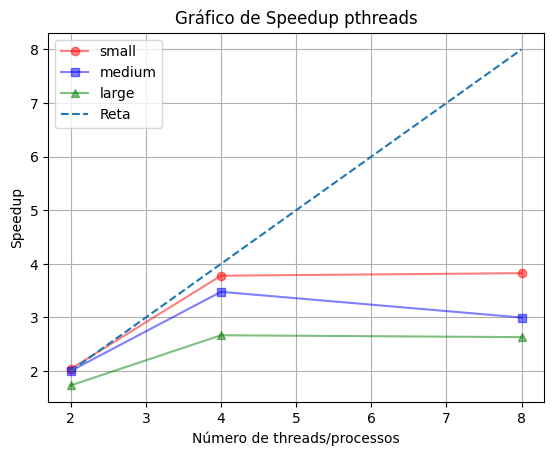

In [51]:
plt.plot(threads, speedups_pthreads[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_pthreads[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_pthreads[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup pthreads')
plt.grid(True)
plt.legend()
plt.show()

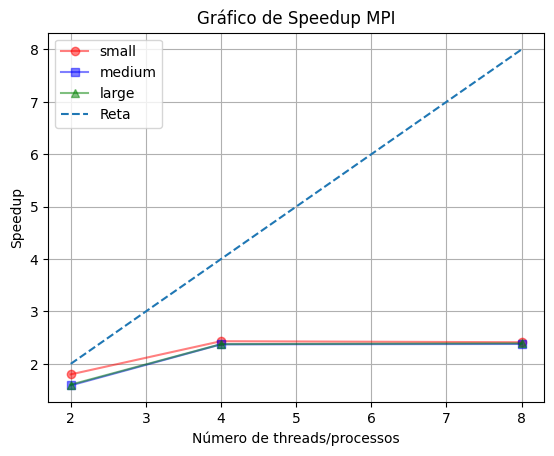

In [52]:
plt.plot(threads, speedups_mpi[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_mpi[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_mpi[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup MPI')
plt.grid(True)
plt.legend()
plt.show()